In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
gs=pd.read_csv('/content/gender_submission.csv')
train.shape

(891, 12)

In [ ]:
test=pd.merge(test,gs,on='PassengerId',how='inner')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
from operator import index
df=pd.concat([train,test],axis=0)
df.reset_index(inplace=True,drop=index)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


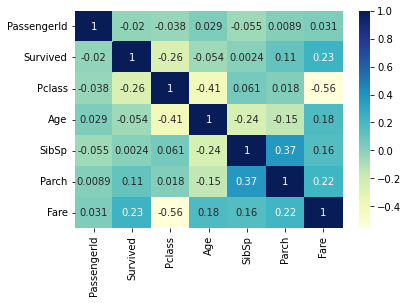

In [ ]:
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
df.shape

(1309, 12)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
g=df.groupby('Pclass').median()['Age']
g.mean()

30.666666666666668

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].value_counts()

24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64

In [ ]:
filt= df['Age'].isna()
df.loc[filt,'Age']=30
#df.loc[filt,'Age']=39

#filt2=df['Pclass']==2  & df['Age'].isna()
#df.loc[filt2,'Age']=29

#filt3=df['Pclass']==3  & df['Age'].isna()
#df.loc[filt3,'Age']=24

df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [ ]:
#df[df['Fare'].isna()]

In [ ]:
g=df.groupby('Pclass').mean()['Fare']
g

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [ ]:
filt=df['Fare'].isna()
df.loc[filt,'Fare']=g[3]
df.loc[1043]

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                    13.302889
Embarked                        S
Name: 1043, dtype: object

In [ ]:
filt=df['Pclass']==1
df.loc[filt,'Embarked'].mode()

0    S
dtype: object

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(['Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

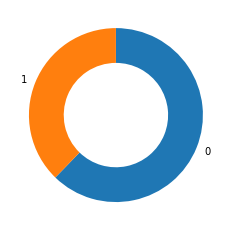

In [ ]:
sorted_counts = df['Survived'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
## people who survived less than people who died 

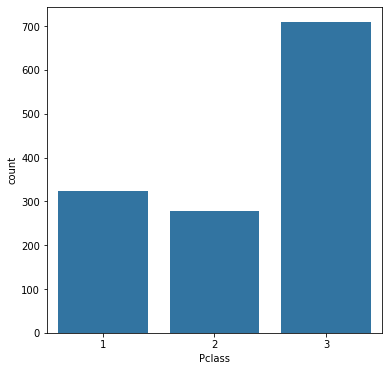

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Pclass',color=c)

## pclass 3 contain more people

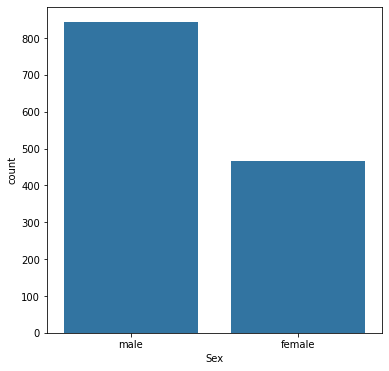

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Sex',color=c)

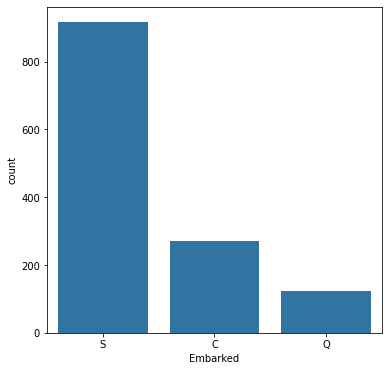

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Embarked',color=c)

## the common embark is s

(array([ 51.,  31.,  27., 116., 184., 160., 395., 100.,  69.,  66.,  43.,
         27.,  27.,   5.,   6.,   1.,   1.,   0.,   0.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <a list of 19 Patch objects>)

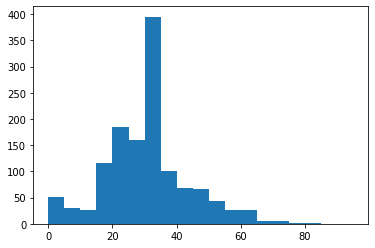

In [ ]:
bins = np.arange(0, df['Age'].max()+20, 5)
plt.hist(data = df, x = 'Age', bins = bins)

# most common age is betweem 20-40

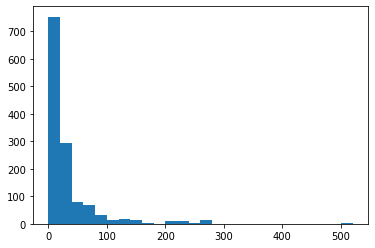

In [ ]:
bins = np.arange(0, df['Fare'].max()+20, 20)
plt.hist(data = df, x = 'Fare', bins = bins)
plt.show()

## most common fare is more than 0 and less than 100 and there is an outlietrs at 500 & (200-300)

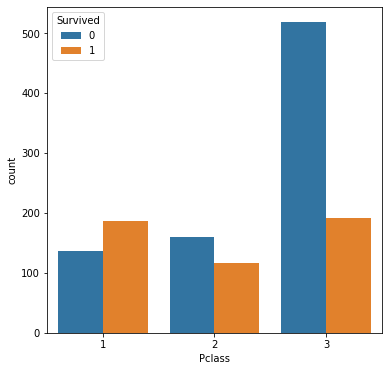

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Pclass',hue='Survived')             
# most people survived are from class 1   

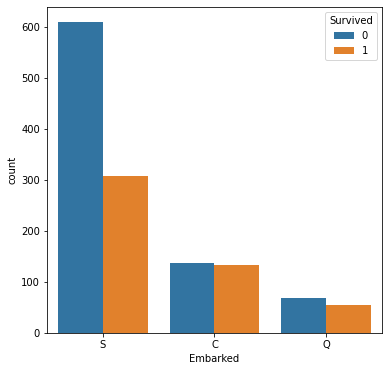

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Embarked',hue='Survived')                 #n=1
# most people died from embark S 
# most people survived from embarked c according to not survived people

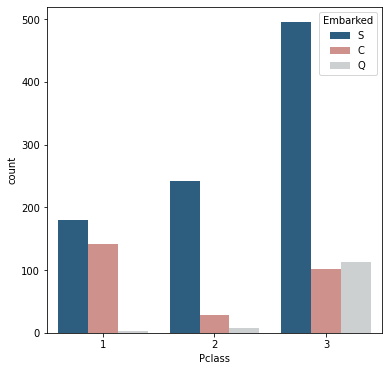

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=['#21618C','#D98880','#CCD1D1']
sb.countplot(data=df,x='Pclass',hue='Embarked',palette=c)       #n=2
# from above people from embark c are rich, from pclass 1 and most of them have survived 
  

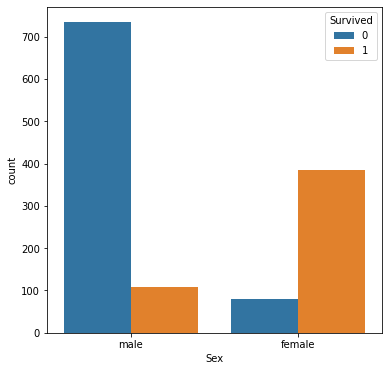

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.countplot(data=df,x='Sex',hue='Survived')
# most of females are survived  

Text(0, 0.5, 'fare')

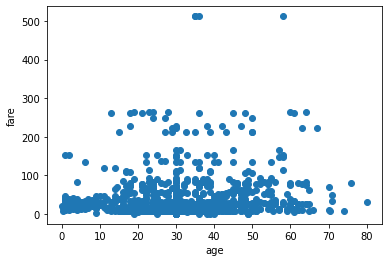

In [ ]:
plt.scatter(data = df, x = 'Age', y = 'Fare');
plt.xlabel('age')
plt.ylabel('fare')

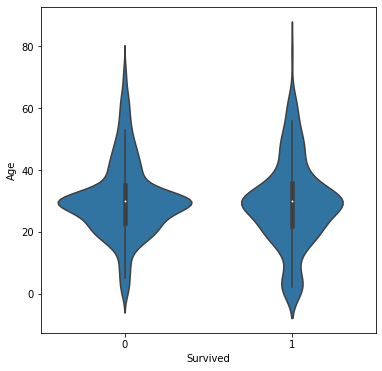

In [ ]:
fig,ax=plt.subplots(figsize=(6,6))
c=sb.color_palette()[0]
sb.violinplot(data=df,x='Survived',y='Age',color=c)
# most of children and older people are survived 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


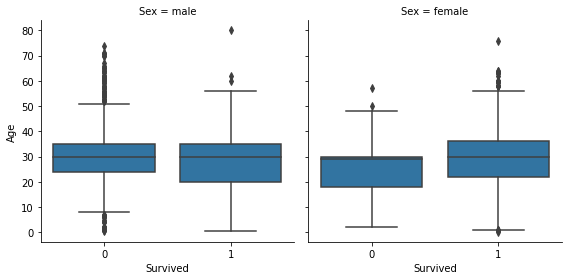

In [ ]:
g = sb.FacetGrid(data = df, col = 'Sex', size = 4)
g.map(sb.boxplot, 'Survived', 'Age');
plt.show()

# all the male children died and all the female children survived 
# most of old women survived but most of old men died 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


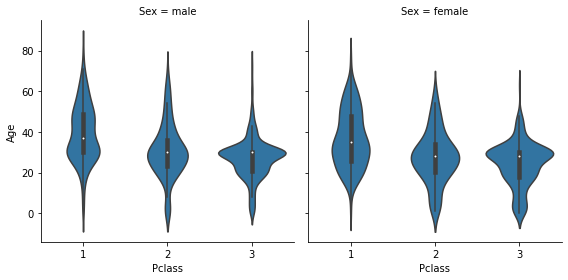

In [ ]:
g = sb.FacetGrid(data = df, col = 'Sex', size = 4)
g.map(sb.violinplot, 'Pclass', 'Age');
plt.show()

#most of old people are in pclass 1
